# Homework 2 Intro

In this notebook, you will practice concepts from AIMA chapters 3,4, and 6. The main topics include:
- Informed Search
- Complex Search (adding uncertainty)
- Constraint Satisfaction Problems

You will write your conceptual answers and code into this notebook. You may include images, links, and math equations as you feel they are needed. I have included cells that suggest where to include your answers, but you can add more cells as needed to keep your work organized.

When you are done with your assignment, make sure to reset your session and test that all of your code works properly when executed from top to bottom.

You will submit this notebook and any accompanying files on the Homework 2 assignment on Canvas.

**A note on "correctness"**. As we have already discussed in class, there is no single correct way to solve a problem. Many of these questions are up to interpretation and I am not seeking a specific solution. As long as your solution meets the requirements mentioned in the rubric and problem description, I am less concerned about the details (i.e., I don't care exactly what data structure you use or what the exact outputs are).

 # Part 1: Conceptual Questions

For this part, write your answer in the corresponding cell for each question. Your answers should be written in complete sentences and edited for grammar and spelling.

## Question 1.1

Using your own words, how would you explain the purpose and steps of hill climbing to someone without a computer science background? Try to avoid jargon and use as simple language as possible. Some concepts you should consider including in your explanation (among others) are:
- the idea of optimization 
- identifying local optima

There is no minimum or maximum length for this question. I expect a thorough answer will be about one long paragraph or a few shorter paragraphs.

*Double click and start writing your answer here*

You can add additional markdown cells as needed.

Hill climbeng represents a local search algorithim aimed at optimizin a soluton by iteratively selecting the most promising neighboring state. It works like climbing up a hill to reach its peak without seeing the entire terrain. The main goal are to quickly find good solution in big search spaces where checking everything is not practical. You start with an initial state then make small improvements based on a objective function.

To explain steps in an simple way - start with a configuration, look at alternatives nearby. Choose one that makes biggest improvement in evaluation metric. Then you just repeat until no more improvements are possible! This represents the idea of optimization. Every step tries maximizing progress towards goal.

A significant challenge is when local optima happens; this are situations where the algoritm gets stuck on a suboptimal peak becauses surroundink options seem worse, even when better global solutions exist elsewhere in the search space. As the lecture materials demonstrate, hill climbing proves efficient due to its simplicity and rapidity in problems featuring continuous or extensive discrete spaces, although variations such as random restarts may facilitate escape from these predicaments by commencing new searches from alternative positions.

## Question 1.2

Consider the problem of constructing (not solving) a crossword puzzle by fitting words into a rectangular grid. The grid, which is given as part of the problem, specifies which squares are blank and which are shaded. Assume that a list of words (i.e., a dictionary) is provided and that the task is to fill in the blank squares by using any subset of the list. Please write a detailed description of this problem from two perspectives:
1. How would you frame this as a general search problem? What informed search algorithm would you choose and what would be an appropriate heuristic? Is it better to fill in blanks one letter at a time or one word at a time?
2. How would you frame this as a constraint satisfaction problem? Should the variables be words or letters?

Finally, which formulation do you think will be better? Why?

There is no expected length for your answer to this question. Make sure you fully explain your reasoning for each question. Please organize your answer in a way that I can easily tell which question you are answering.

*Start writing your answer here*

You can add additional markdown cells as needed.

1.
I'd frame it as starting from an empty grid state, with actions like placing words or letters into blanks. Goal is a fully filled grid with dictionary words that fit without conflicts. For informed search, A* seems good, with a heuristic like number of unfilled slots plus mismatches at intersections. Filling one word at a time is probably better than letters, because letters would create way too many branches and invalid combos.

2.
Variables could be the blank squares with domains A-Z, constraints ensuring rows or columns form words from the list. Or variables as word slots across or down with word domains, constraints for matching letters at crosses. I think words as variables makes more sense, less unnecessary things.

CSP, I guess, since it's built for handling constraints like this and prunes bad paths early with backtracking. Search might explore too much unnecessary branches.

# Part 2: Coding Question

Your solution to the following problem should be written using the Python programming language.

## Question 2

For this problem, you will investigate how the belief state of an agent changes depending on uncertainty in its actions and in the environment. Consider the vacuum world that has 8 possible states (labeled as `S1` through `S8`). These states are defined by which cells are dirty and which cell the agent is currently in. Assume the cells are labeled as `Left` and `Right` and the possible actions are `Suck`, `MoveLeft`, and `MoveRight`.

![Screenshot 2025-09-17 at 2.28.14 PM.png](<attachment:Screenshot 2025-09-17 at 2.28.14 PM.png>)
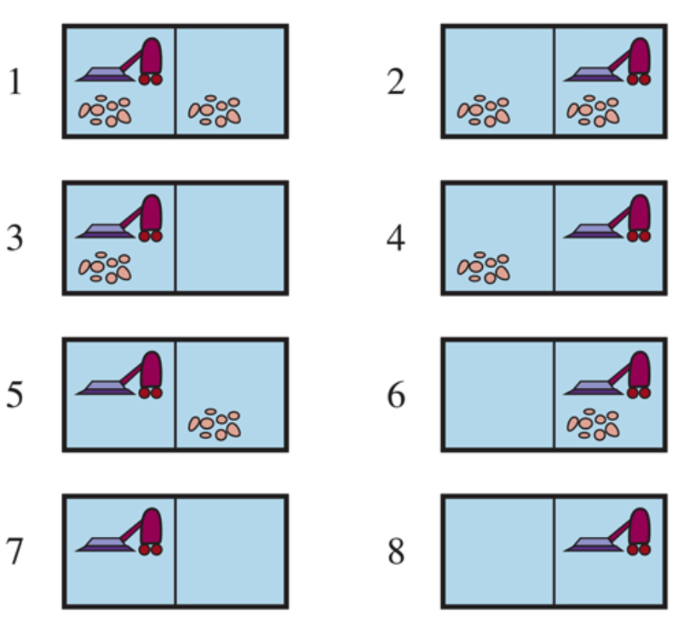

We will first define our transition models for deterministic and non-deterministic actions. These will both be implemented as dictionaries. For the transition models, complete the dictionary so that the result of `transition_model[state][action]` gives a list of possible next states that result from taking a particular action in a certain state. If an agent tries to move into a wall, it ends up staying in the same location.

For the non-deterministic model, assume that the `MoveLeft` and `MoveRight` actions sometimes fail so the agent does not end up moving. The `Suck` action works properly every time.

In [1]:
# define deterministic transition model
# how to interpret: if I start in state 1 and take action Suck, I will end up in state 5
# that is, transitions_det[1]["Suck"] = 5

transitions_det = {
    1 : {"MoveRight" : [2], "Suck" : [5], "MoveLeft" : [1]},
    # TODO: complete the rest!
    2 : {"MoveRight": [2], "Suck": [4], "MoveLeft": [1]},
    3 : {"MoveRight": [4], "Suck": [7], "MoveLeft": [3]},
    4 : {"MoveRight": [4], "Suck": [4], "MoveLeft": [3]},
    5 : {"MoveRight": [6], "Suck": [5], "MoveLeft": [5]},
    6 : {"MoveRight": [6], "Suck": [8], "MoveLeft": [5]},
    7 : {"MoveRight": [8], "Suck": [7], "MoveLeft": [7]},
    8 : {"MoveRight": [8], "Suck": [8], "MoveLeft": [7]},
    
}

# similarly, define the non-deterministic transition model
# we will need to consider multiple possible next states

transitions_nondet = {
    1 : {"MoveRight" : [1, 2], "Suck" : [5], "MoveLeft" : [1]},
    # TODO: complete the rest!
    2 : {"MoveRight": [2], "Suck": [4], "MoveLeft": [1, 2]},
    3 : {"MoveRight": [3, 4], "Suck": [7], "MoveLeft": [3]},
    4 : {"MoveRight": [4], "Suck": [4], "MoveLeft": [3, 4]},
    5 : {"MoveRight": [5, 6], "Suck": [5], "MoveLeft": [5]},
    6 : {"MoveRight": [6], "Suck": [8], "MoveLeft": [5, 6]},
    7 : {"MoveRight": [7, 8], "Suck": [7], "MoveLeft": [7]},
    8 : {"MoveRight": [8], "Suck": [8], "MoveLeft": [7, 8]},
}

Now, we will write a function that, given the current belief state and an action, returns the new belief state. Consider how you will account for uncertainty. If we take an action from a given belief state, the resulting belief state will be the *union* of all possible next states we can reach.

In [3]:
def update_belief_action(belief, action, isDet):
    """
    Given a list of possible current states (belief) and an action,
    return the new belief list.

    Inputs: belief (list of possible starting states)
            action (string, name of the action taken)
            isDet (boolean, True means use deterministic model and False means nondeterministic)
    Outputs: new_belief (list of possible ending states)
    """

    new_belief = []
    # TODO: implement using union of all possible next states
    if isDet:
        trans = transitions_det
    else:
        trans = transitions_nondet
    
    possible_states = set()
    for current_state in belief:
        if current_state in trans and action in trans[current_state]:
            next_states = trans[current_state][action]
            for next_state in next_states:
                possible_states.add(next_state)
        else:
            possible_states.add(current_state)
    
    new_belief = sorted(list(possible_states))

    return new_belief


Test out your function by running a few examples!

In [4]:
start_belief = [1]      # change this to a different state, or multiple states
action = "MoveLeft"     # change this to a different action
isDet = True            # change this to be nondeterministic

new_belief = update_belief_action(start_belief, action, isDet)

print(f"Starting with state {start_belief}, taking action {action} gives a result of {new_belief}")

Starting with state [1], taking action MoveLeft gives a result of [1]


Next, we will define our observation model. We will also implement this as a dictionary. For the observation model, complete the dictionary so that the result of `observation_model[observation]` gives a list of possible states that match that observation. 

We will consider two observation options. In the model 1, the agent knows whether each cell is clean or dirty. In model 2, the agent only knows whether its current cell is clean or dirty.

In [11]:
# define model 1
# observation is in the form (isLeftDirty, isRightDirty)\

observations1 = {
    (True, True) : [1, 2],
    # TODO: complete the rest!
    (True, False): [3, 4],
    (False, True): [5, 6],
    (False, False): [7, 8]
}

# define model 2
# observation is in the form isCurrentDirty
observations2 = {
    True : [1, 2, 3, 6], # TODO: fill in states
    False : [4, 5, 7, 8] # TODO: fill in states
}

Now we will write a function that, given a starting belief state and an observation, returns the updated belief. Consider how you will need to update the belief state. The new belief should be the *intersection* of the current belief state with the set of states consistent with that observation.

In [10]:
def update_belief_observation(belief, observation):
    """
    Given a belief and an observation,
    return the updated belief using intersection with the observation model.

    Inputs: belief (list of possible starting states)
            observation (either bool or tuple of bools, which cell(s) are dirty)
    Outputs: new_belief (list of possible ending states)
    """

    new_belief = []

    # TODO: implement using set intersection
    if isinstance(observation, tuple):
        if observation in observations1:
            valid_states = observations1[observation]
        else:
            valid_states = []
    elif isinstance(observation, bool):
        if observation in observations2:
            valid_states = observations2[observation]
        else:
            valid_states = []
    else:
        valid_states = []
    filtered = set(belief).intersection(set(valid_states))
    new_belief = sorted(list(filtered))

    return new_belief


Test it out!

In [7]:
start_belief = [1, 5, 7]        # change this to a different state, or multiple states
observation = (True, False)     # change this to a different combo or single value

new_belief = update_belief_observation(start_belief, observation)

print(f"Starting with state {start_belief}, observation {observation} gives a result of {new_belief}")

Starting with state [1, 5, 7], observation (True, False) gives a result of []


Finally, use the space below to simulate a sequence of actions and observations. That is, start with a belief state and repeatedly call your update functions. After each step, print out the belief state to see how it changes over time. Try different combinations of transition and observation models.

In [9]:
# TODO: put your code here
# Simulation 1: Deterministic, observation model 1
print("=== Deterministic test ===")
belief = [1, 3, 5, 7]
print("Start with:", belief)

belief = update_belief_action(belief, "MoveRight", True)
print("Move right ->", belief)

belief = update_belief_observation(belief, (False, True))
print("See (F,T) ->", belief)

belief = update_belief_action(belief, "Suck", True)
print("Suck ->", belief)

belief = update_belief_observation(belief, (False, False))
print("See (F,F) ->", belief)

# nondeterministic
print("\n=== Nondeterministic test ===")
belief = [1]
print("Start with:", belief)

belief = update_belief_action(belief, "Suck", False)
print("Suck (nondet) ->", belief)

belief = update_belief_observation(belief, False)
print("See False ->", belief)

belief = update_belief_action(belief, "MoveRight", False)
print("Move right (nondet) ->", belief)

belief = update_belief_observation(belief, True)
print("See True ->", belief)


=== Deterministic test ===
Start with: [1, 3, 5, 7]
Move right -> [2, 4, 6, 8]
See (F,T) -> [6]
Suck -> [8]
See (F,F) -> [8]

=== Nondeterministic test ===
Start with: [1]
Suck (nondet) -> [5]
See False -> [5]
Move right (nondet) -> [5, 6]
See True -> [6]


Write a summary explaining what you notice from your simulations above. What situations make the belief state bigger or smaller? Is there any unexpected behavior? Please write at least four sentences.

From the simulations, I notice that in non-deterministic models, movement actions often increase the belief state size by including both the successful move and the failure to move, introducing more uncertainty. In contrast, deterministic actions and the Suck action tend to either keep the size the same or reduce it when multiple states converge to fewer after the action. Observations consistently make the belief state smaller or keep it the same by intersecting with consistent states, effectively reducing uncertainty. An unexpected behavior is when the belief state becomes empty after an observation that is inconsistent with the current possible states, indicating that the perceived observation is impossible given the prior belief.

# Extra Credit

For up to 10 extra credit points, develop a simple reflex agent that works with the environment described above. What action rules would you define? I will not provide any structure here, it's up to you to decide how you want to interpret and tackle the problem.